In [1]:
import makesens.tratamiento.tratamiento as mkt
import makesens.visualizacion.visualizacion as mkv
#------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
amb = mkt.loaddata_amb('../Data/DATOSMINUTOS.csv','csv')
eva2 = pd.read_csv('../Data/EVAS_Pilar/Eva2_pilar.csv')
racimo = mkt.loaddata_racimo('../Data/C_clg_comuneros_sum_todos_minutales_2020-12-01.csv',2,10,'1T')

In [3]:
amb.PM10 = pd.to_numeric(amb.PM10)
amb['PM2.5']  = pd.to_numeric(amb['PM2.5'])
#-------------------------------------------------------------------------
eva2.index = pd.DatetimeIndex(eva2['Unnamed: 0']) - pd.Timedelta(hours = 5, minutes = 5)
eva2.index = eva2.index.strftime('%Y-%m-%d %H:%M:%S')

In [4]:
datastart = '2020-12-13 00:00:00'
dataend = '2020-12-31 23:00:00'
amb,eva2,racimo = mkt.cutdata([amb,eva2,racimo],datastart,dataend)

In [5]:
PM10 = mkt.Merge([amb.PM10,racimo['pm10_a'],mkt.rolling(eva2['pm10_nan'],10)])
PM10.columns = ['AMB','RACIMO','EVA']

In [6]:
coef_rac, interc_rac ,PM10_racimo_cal = mkt.LinearModel([PM10.AMB,PM10.RACIMO],0.5)
coef_eva, interc_eva ,PM10_eva_cal = mkt.LinearModel([PM10.AMB,PM10.EVA],0.5)

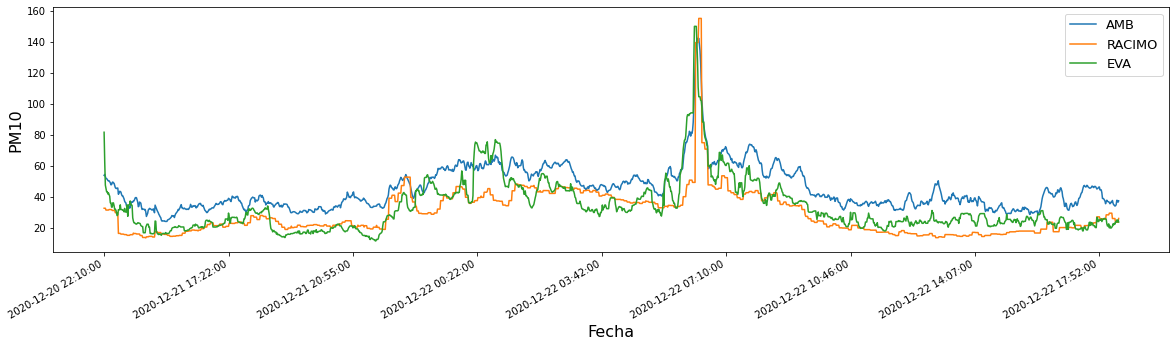

In [7]:
mkv.vizualize([PM10.AMB,PM10.RACIMO,PM10.EVA],['AMB','RACIMO','EVA'],'Fecha','PM10',16,(20,5))

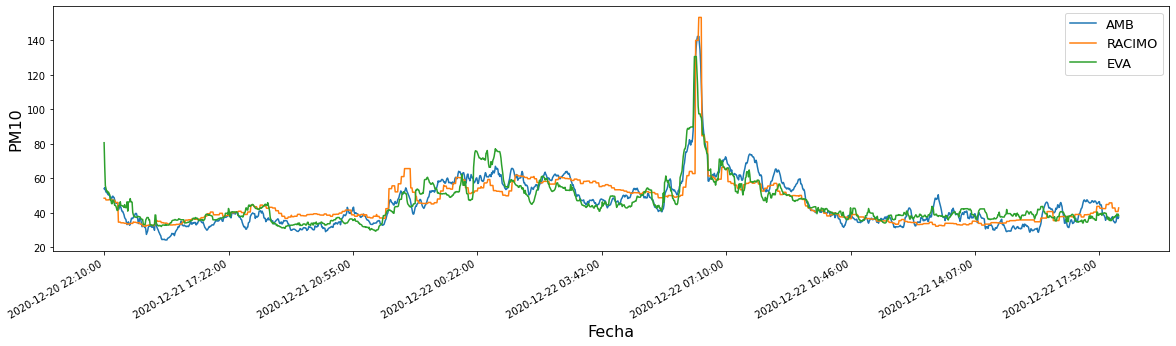

In [8]:
mkv.vizualize([PM10.AMB,PM10_racimo_cal,PM10_eva_cal],['AMB','RACIMO','EVA'],'Fecha','PM10',16,(20,5))

In [12]:
print('Racimo: ', 'Coeficiente', coef_rac[0], 'Intercepción', interc_rac)
print('EVA: ', 'Coeficiente', coef_eva[0], 'Intercepción', interc_eva)

Racimo:  Coeficiente 0.856287460825364 Intercepción 20.419031028775287
EVA:  Coeficiente 0.7313678954760435 Intercepción 20.842069129318507
